In [59]:
import datetime as datetime
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import numpy as np
import pandas as pd
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10, 5)
import re
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation

## Loading DataFrames

In [3]:
udf = pd.read_pickle('Your/Data/Path/tweaked_user_dataframe.pkl')
udf

,location,id,name,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,country
0,"Waiyaki Way, Westlands",697374646614781952,AACC-CETA,False,1565,666,2795,Kenya
1,NaN,87371572,ACNA,False,9023,1796,3393,NaN
2,Anglican Communion Office,903497472,Anglican Alliance,False,2291,1195,3599,United Kingdom
3,Rome,761714520,Anglican Centre Rome,False,2681,839,1733,Italia
4,"Nairobi, Kenya",1020255964044328961,Anglican Church of Kenya,False,1095,185,567,Kenya
...,...,...,...,...,...,...,...,...
166,"Federal Way, WA",11859822,World Vision USA,True,554386,14283,92602,Sénégal
164,"Plot 15B Nakasero, Kampala",759998299,World Vision Uganda,False,4278,580,3375,United Kingdom
167,"Dakar, Senegal",830807449,World Vision West Africa,False,2245,563,2088,United States
157,"Addis Ababa, Ethiopia",2231308272,WorldVision Ethiopia,False,1958,178,420,België / Belgique / Belgien


In [4]:
df = pd.read_pickle('Your/Data/Path/tweet_dataframe.pkl')
df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


## Cleanup

In [8]:
# Functions
# --- Drop columns not needed for analysis from tweet DataFrame
def clean_tweet(df):
    return (df
           .drop(columns=[c for c in df.columns if 'entities.cashtags' in c])
           .drop(columns=['id', 'lang', 'in_reply_to_user_id', 'conversation_id',
                          'public_metrics.retweet_count', 'public_metrics.reply_count',
                          'public_metrics.like_count', 'public_metrics.quote_count',
                          'entities.urls',
                          'geo.place_id', 'geo.coordinates.type', 'geo.coordinates.coordinates', 
                          'withheld.copyright', 'withheld.country_codes', 'withheld.scope', 'reply_settings'])
                          )

# --- Modify tweet DataFrame to add new columns needed for analysis
def modify_tweet(df):
    return (clean_tweet(df)
                .assign(is_reply=df['text'].str.startswith('@'),
                   referenced_type=df['referenced_tweets'].apply(lambda t: t[0]['type'] if isinstance(t, list) else np.nan),
                   length=lambda df_:df_.text.str.len(),
                   tweet_count=1,
                   created_truncated=df['created_at'].apply(lambda d: datetime.date(d.year, d.month, d.day)),
                  )
           )

# --- merge modified tweet and user DataFrames
def create_analysis_frame(df1, df2):
    return(modify_tweet(df1)
            .merge(df2, left_on='author_id', right_on='id', how='left')
            .drop(columns = ['id', 'referenced_tweets', 'verified', 'location',
                                'public_metrics.following_count', 'public_metrics.tweet_count'])
            )

# Main
tdf = create_analysis_frame(df, udf)

with pd.option_context('display.max_colwidth', 280):
    display(tdf)

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit @LesmoreGEzkiel @DrMwaniki @fmwombeki Thanking God 4 this historic moment n church history n Kenya! 2 God b the glory! Ashe! Amen! @Oikoumene @AaccCeta @AdNAUbuntu @JaCouncilChurch @ncccusa @iamepiscopalian @GETIWCC @WCCpaween @An...,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerSmith7', 'id': '1868363888'}, {'start': 19, 'end': 28, 'username': 'AaccCeta', 'id': '697374646614781952'}, {'start': 29, 'end': 45, 'username': 'ArchbishopSapit', 'id': '798412484742959105'}, {'start': 46, 'end': 61, 'username': '...","[{'start': 93, 'end': 95, 'probability': 0.9196, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[thanking, god, historic, moment, church, history, kenya, god, glory, ashe, amen]",False,retweeted,363,1,2021-09-12,AACC-CETA,1565,Kenya
1,697374646614781952,RT @sceptwic: Another important step in road to #JusticeDignitySolidarity. Kenyan churches leading the way it seems as number of women in #episcopate rises again. @ACK @full_kenya https://t.co/CAPRZdimkq,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic', 'id': '35702398'}]",NaN,"[{'start': 48, 'end': 73, 'tag': 'JusticeDignitySolidarity'}]","[another, important, step, road, #justicedignitysolidarity, kenyan, churches, leading, way, seems, number, women, #episcopate, rises, <-url->]",False,retweeted,203,1,2021-09-12,AACC-CETA,1565,Kenya
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of Butere. The first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. We thank God for the new chapters being written in the history of the Church. https://t.co/6Up7M3cEsb,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.5163, 'type': 'Person', 'normalized_text': 'Ven Rose Okeno'}, {'start': 108, 'end': 131, 'probability': 0.5879, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 144, 'end': 146, 'probability': 0.976, 'type':...",NaN,"[congratulations, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, thank, god, new, chapters, written, history, church, <-url->]",False,NaN,236,1,2021-09-12,AACC-CETA,1565,Kenya
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Diocese of Butere. She is the first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. New chapters being written in the history of the Church. We thank God for such moments. https://t.co/hzkus3byb5,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5667, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 217, 'end': 219, 'probability': 0.9677, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[consecration, service, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, new, chapters, written, history, church, thank, god, moments, <-url->]",False,NaN,262,1,2021-09-12,AACC-CETA,1565,Kenya
4,697374646614781952,We are looking forward to today’s Consecration and Enthronement of the first Woman Bishop in The Anglican Church of Kenya Ven. Rose Okeno.,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6155, 'type': 'Place', 'normalized_text': 'Kenya Ven'}, {'start': 127, 'end': 136, 'probability': 0.8553, 'type': 'Person', 'normalized_text': 'Rose Okeno'}]",NaN,"[looking, forward, today, consecration, enthronement, first, woman, bishop, anglican, church, kenya, ven, rose, okeno]",False,replied_to,138,1,2021-09-12,AACC-CETA,1565,Kenya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proffered 4 areas that need to be address to avert the possible catastrophe

In [27]:
def tweet_counter(df):
    return (df
            .set_index('created_at')
            .sort_index()
            .tweet_count
            .resample('d')
            .sum()
            .rename('counts')
            .to_frame()
           )

In [29]:
def median_abs_dev(df, constant=None):
    if constant is None:
        # allows us to use the MAD to roughly approximate to the standard deviation
        # see the wikipedia page
        constant = 1.4826
    return constant * np.median(np.abs((df - np.median(df))))


def mad_normalize(df, constant=None):
    # puts this dataframe into multiples of the MAD, similar to Zscoring
    # abs(x - median(x)) / MAD(df)
    return (df
             .sub(np.median(df))
             .pipe(np.abs)
             .div(median_abs_dev(df)))

In [25]:
def top_dates(df):
    return (df
             .pipe(np.log)
             .diff()
             .dropna()
             .pipe(mad_normalize)
             .sort_values(by="counts", ascending=False)
             .head()
             .index
             .values
            )

In [38]:
TWEET_TOKENIZER = TweetTokenizer(preserve_case=False,
                                 strip_handles=True, reduce_len=False)
STOPWORDS = (set(nltk.corpus.stopwords.words("english")) |
             {"...", '…', '•', '’', "com"} |
             set(punctuation))

def replace_urls(string, replacement=None):
    if replacement is None:
        replacement = "<-URL->"
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, string)

def tokenizer(tweet_text, custom_words=None):
    text = (replace_urls(tweet_text))
    tokens = TWEET_TOKENIZER.tokenize(text.lower())
    tokens = (token for token in tokens if token not in punctuation)
    tokens = (token for token in tokens if token.islower())
    tokens = (token for token in tokens if token not in STOPWORDS)
    tokens = (token for token in tokens if len(token) >= 3)
    if custom_words:
        tokens = (token for token in tokens if token not in custom_words)
    return list(tokens)

def get_frequent_terms(text_series, stop_words=None, ngram_range=None):
    if ngram_range is None:
        ngram_range = (1, 3)
    '''
    Input:
       text_series: a list or series of documents
       stop_words: a list of stop_words to ignore, or the string 'english',
                   which uses a built-in stop word list for the english language.
                   By default, there are no stop words used
       ngram_range: a single int, or a 2 tuple representing the range of ngrams to count.
                    the default (1,2) counts 1- and 2- grams.
    Returns:
       a dataframe of counts, indexed by n-gram
    '''
    count_vectorizer = CountVectorizer(analyzer = "word",
                                       tokenizer = tokenizer,
                                       stop_words = stop_words, # try changing the stopword sets that we use.
                                                                # notice that many top terms are words like
                                                                # "and" and "the"
                                       ngram_range = ngram_range # you can change this to count frequencies of
                                                           # ngrams as well as single tokens
                                                           # a range of (1,2) counts 1-grams (single tokens) and
                                                           # 2-grams (2-token phrases)
                                      )
    term_freq_matrix = count_vectorizer.fit_transform(text_series)
    terms = count_vectorizer.get_feature_names()
    term_frequencies = term_freq_matrix.sum(axis = 0).tolist()[0]

    term_freq_df = (pd.DataFrame(list(zip(terms, term_frequencies)), columns = ["token","count"])
                    .set_index("token")
                    .sort_values("count",ascending = False))
    return term_freq_df

## Communication Volume

In [13]:
# Create DataFrame with tweets/day
ddf =(tdf
      .set_index('created_at')
      .sort_index()
      .tweet_count
      .resample('d')
      .sum()
      .rename('counts')
      .to_frame()
     )
ddf

,counts
created_at,
2019-01-01 00:00:00+00:00,123
2019-01-02 00:00:00+00:00,182
2019-01-03 00:00:00+00:00,213
2019-01-04 00:00:00+00:00,206
2019-01-05 00:00:00+00:00,98
...,...
2021-09-08 00:00:00+00:00,204
2021-09-09 00:00:00+00:00,190
2021-09-10 00:00:00+00:00,215


<AxesSubplot:xlabel='created_at'>

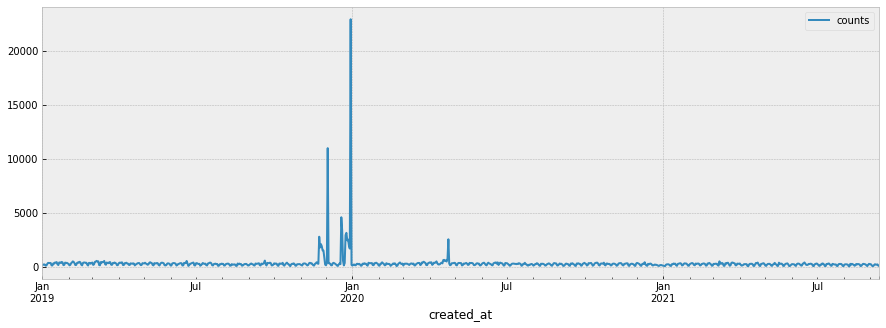

In [10]:
# Plot tweets/day
fig, ax = plt.subplots(figsize=(15,5))
(ddf
 .plot(ax=ax)
)

<AxesSubplot:xlabel='created_at'>

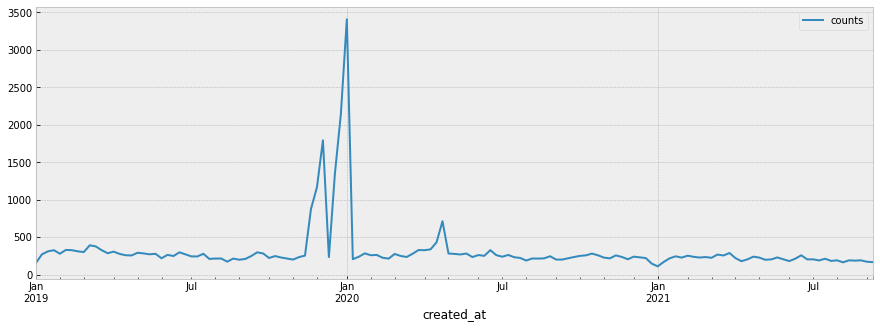

In [11]:
# Plot tweets/week
fig, ax = plt.subplots(figsize=(15,5))
(ddf
 .resample('w')
 .mean()
 .plot(ax=ax)
)

##### Weekend dips in posting activity

Text(0.5, 1.0, 'Visualization of weekend-dips in posting acitvity')

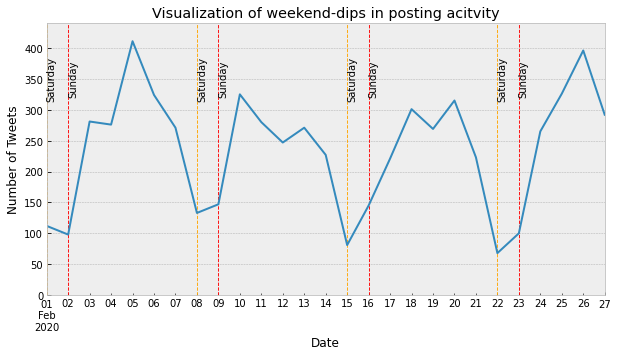

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

(ddf
 .loc[(ddf.index >= '2020-02-01') 
     & (ddf.index < '2020-02-28')]
 .counts
 .plot(ax=ax)
)

saturdays = ['2020-02-01', '2020-02-08', '2020-02-15', '2020-02-22']
for sa in saturdays:
    ax.vlines(sa, 0, 440, colors='orange', linestyles='--', label='Saturday', lw=0.9)
for x in saturdays:
    text(x, 350, 'Saturday', rotation=90, verticalalignment='center')

sundays = ['2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23']
for so in sundays:
    ax.vlines(so, 0, 440, colors='red', linestyles='--', label=f'{str(so)[-2:]}. Sunday', lw=0.9)
for x in sundays:
    text(x, 350, 'Sunday', rotation=90, verticalalignment='center')


ax.set_ylim(bottom=0, top=440)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Visualization of weekend-dips in posting acitvity')

##### Gesamtkommunikationsvolumen

Text(0.5, 1.0, 'Simple Moving Average of Number of Tweets')

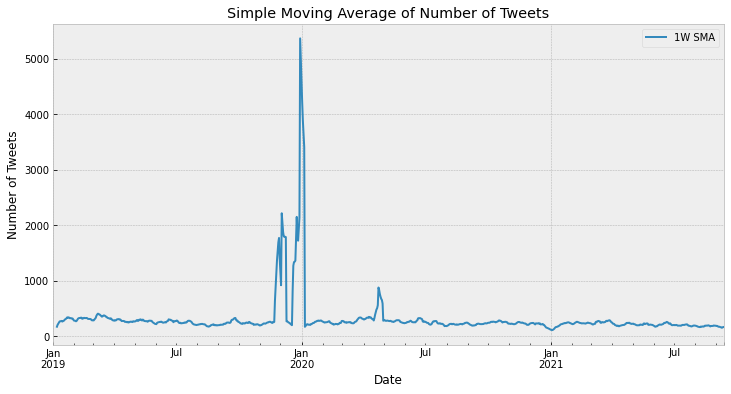

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))
fig.tight_layout()
(ddf 
 .rolling(7) # rolling(7) instead of resample(w) to keep weekend dips visible
 .mean()
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Simple Moving Average of Number of Tweets')

### Cleaning process for peaked data:
As the above figure shows the dataset contains a few peaks in tweeting activity
that are unreasonably high compared to the average tweeting activity. 
A closer look into these peaks showed (as can be seen following along the steps below)
that they were automated advertisement tweets from just one TUA. 
Therefore, the peaks were removed from the dataset.

This file contains the commented removal of the first peak.
Further files for the other peaks follow the same logic, so they won't be commented.

In general the process consists of four steps:
1. Zooming in on the graph to determine the exact timeframe of a peak
2. Check the timeframe of the peak for most frequent words
3. Identify the tweet text from the automated tweet
4. Remove all automated tweets with given text from dataset

##### Peak 1 - Zoom in on timeframe

Text(0.5, 1.0, 'Moving average of Tweets/Day')

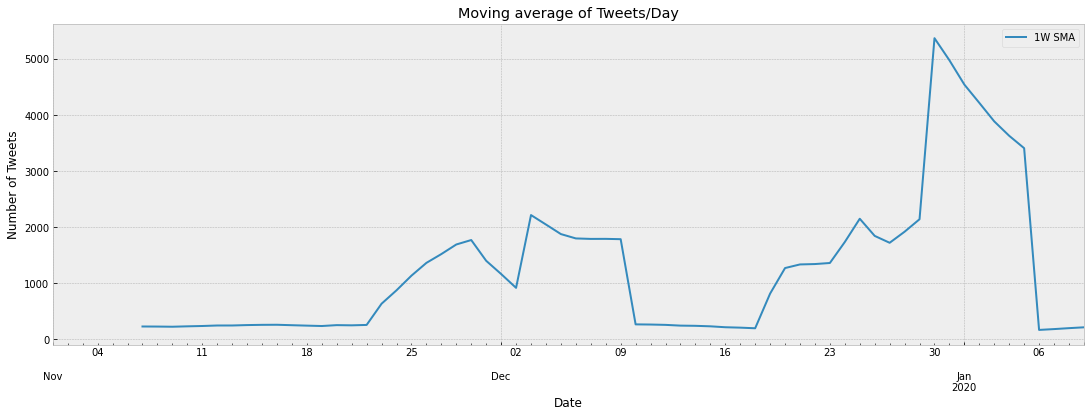

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2019-11-01') &
      (ddf.index < '2020-01-10')]
 .rolling(7)
 .mean()
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

Text(0.5, 1.0, 'Moving average of Tweets/Day')

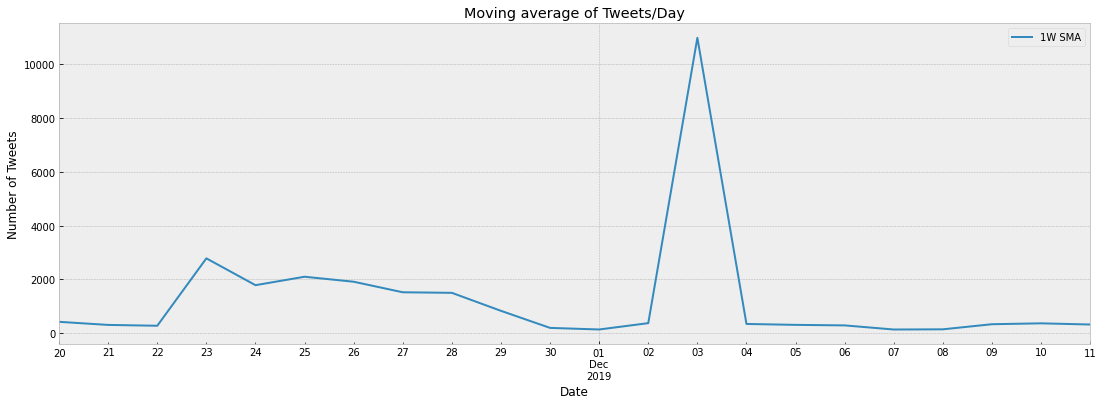

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2019-11-20') &
      (ddf.index < '2019-12-12')]
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

Text(0.5, 1.0, 'Moving average of Tweets/Day')

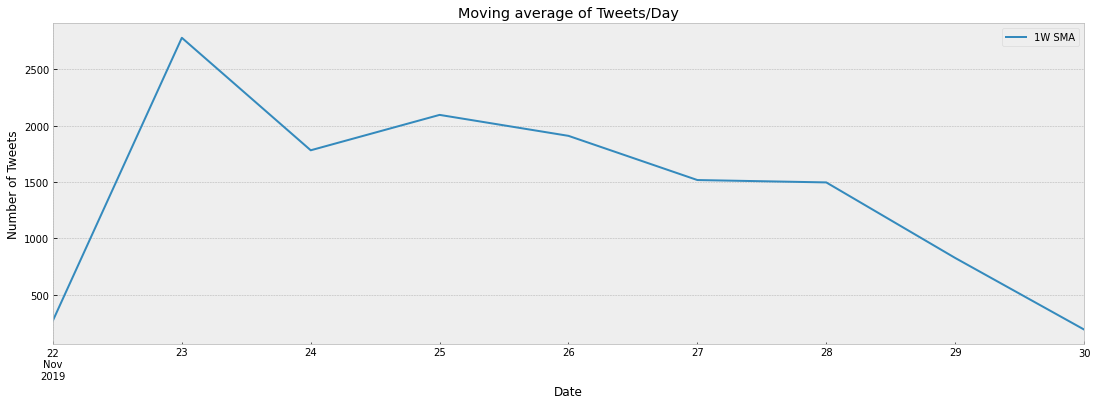

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2019-11-22') &
      (ddf.index < '2019-12-01')]
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

In [23]:
# Create DataFrame containing tweets from the timeframe of peak 1
ndf = tdf[(tdf['created_at'] >= '2019-11-22') & (tdf['created_at'] < '2019-12-01')]
ndf

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
613,697374646614781952,"4 days of sharing skills ,knowledge and inform...",2019-11-29 13:58:09+00:00,NaN,NaN,NaN,"[days, sharing, skills, knowledge, information...",False,NaN,297,1,2019-11-29,AACC-CETA,1565,Kenya
614,697374646614781952,when a house is being robbed who is disarmed ...,2019-11-29 09:27:27+00:00,NaN,NaN,NaN,"[house, robbed, disarmed, first, <-url->, day,...",False,NaN,177,1,2019-11-29,AACC-CETA,1565,Kenya
615,697374646614781952,"The President and General Secretary of AACC, ...",2019-11-29 05:11:18+00:00,NaN,"[{'start': 66, 'end': 82, 'probability': 0.480...",NaN,"[president, general, secretary, aacc, rev, tem...",False,NaN,285,1,2019-11-29,AACC-CETA,1565,Kenya
616,697374646614781952,Glory to God for the fruitful deliberations an...,2019-11-28 20:31:20+00:00,NaN,"[{'start': 9, 'end': 11, 'probability': 0.8835...",NaN,"[glory, god, fruitful, deliberations, newly, e...",False,NaN,186,1,2019-11-28,AACC-CETA,1565,Kenya
617,697374646614781952,An honor for AACC to receive the reliable part...,2019-11-28 07:07:08+00:00,NaN,"[{'start': 63, 'end': 83, 'probability': 0.651...",NaN,"[honor, aacc, receive, reliable, partner, awar...",False,NaN,287,1,2019-11-28,AACC-CETA,1565,Kenya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308252,2193947323,The World Theme for the commemorations is Oran...,2019-11-25 10:46:12+00:00,NaN,NaN,NaN,"[world, theme, commemorations, orange, world, ...",False,replied_to,194,1,2019-11-25,Zimbabwe Council of Churches,5834,NaN
308253,2193947323,The Zimbabwe Council of Churches joins the wor...,2019-11-25 10:46:11+00:00,"[{'start': 229, 'end': 243, 'username': 'ZWRCN...","[{'start': 4, 'end': 31, 'probability': 0.5606...",NaN,"[zimbabwe, council, churches, joins, world, co...",False,NaN,270,1,2019-11-25,Zimbabwe Council of Churches,5834,NaN
308254,2193947323,"My week on Twitter 🎉: 98 Mentions, 45.9K Menti...",2019-11-24 18:02:39+00:00,NaN,"[{'start': 11, 'end': 17, 'probability': 0.781...",NaN,"[week, twitter, mentions, <-url->, mention, re...",False,NaN,161,1,2019-11-24,Zimbabwe Council of Churches,5834,NaN
308255,2193947323,"Our biggest fans this week: 263Chat, Busisa74,...",2019-11-24 07:01:58+00:00,NaN,"[{'start': 37, 'end': 44, 'probability': 0.256...",NaN,"[biggest, fans, week, 263chat, busisa, zimloca...",False,NaN,120,1,2019-11-24,Zimbabwe Council of Churches,5834,NaN


##### Peak 1 - Check for most frequently used words

In [30]:
# Check for days with the most tweets in given timeframe
top_dates(tweet_counter(ndf))

array(['2019-11-23T00:00:00.000000000', '2019-11-30T00:00:00.000000000',
       '2019-11-29T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [40]:
# Get most frequently used terms in given timeframe
get_frequent_terms(ndf['text']).head(15)

,count
token,
<-url->,13189
poverty,10655
giving,10651
check,10648
opportunity,10642
what's,10638
kids,10637
tuesday,10637
empower,10632


In [41]:
# Check for tweet activity/user account
(ndf
 .groupby('author_id')
 .agg({'tweet_count': 'count', 'name': 'last','country': 'last'})
 .sort_values('tweet_count',ascending = False)
 .reset_index(drop=True)
 .rename(columns={'tweet_count': 'Tweets', 'name': 'Nutzername', 'country': 'Land'})
)

,Tweets,Nutzername,Land
0,10689,World Vision USA,Sénégal
1,179,Interfaith Matters,None
2,95,Micah Institute,United States
3,83,Church & Society UMC,United States
4,71,Churches on Internat'l Affairs (WCC-CCIA),Schweiz/Suisse/Svizzera/Svizra
...,...,...,...
102,1,World Vision India,Kenya
103,1,ReligionsforPeaceUSA,United States
104,1,Cambridge Inter-Faith Programme,United Kingdom
105,1,CARITAS,United States


##### Peak 1 - Identify tweet text
In order to do this, cycle through most used <terms> in
.str.contrains('<terms>') below. 

Keep an eye on the size of the resulting
array to identify the right tweet text - the result is already filled in here.

In this case there were two automatically generated tweet (call for action and answer). This means the searching process is repeated after the first time.

In [43]:
(ndf[ndf['text'].str.contains('Thank you for your generosity. We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity!')])

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
293312,11859822,@KoaConti Thank you for your generosity. We’ll...,2019-11-26 21:03:56+00:00,NaN,NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,181,1,2019-11-26,World Vision USA,554386,Sénégal
293313,11859822,@BroadTexas Thank you for your generosity. We’...,2019-11-26 21:03:40+00:00,"[{'start': 0, 'end': 11, 'username': 'BroadTex...",NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,183,1,2019-11-26,World Vision USA,554386,Sénégal
293314,11859822,@Nirvana67432138 Thank you for your generosity...,2019-11-26 21:03:24+00:00,"[{'start': 0, 'end': 16, 'username': 'Nirvana6...",NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,188,1,2019-11-26,World Vision USA,554386,Sénégal
293315,11859822,@marybmathieu Thank you for your generosity. W...,2019-11-26 20:59:27+00:00,NaN,NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,185,1,2019-11-26,World Vision USA,554386,Sénégal
293316,11859822,@MemaSheffer Thank you for your generosity. We...,2019-11-26 20:58:51+00:00,"[{'start': 0, 'end': 12, 'username': 'MemaShef...",NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,184,1,2019-11-26,World Vision USA,554386,Sénégal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300762,11859822,@MadiAnn33 Thank you for your generosity. We’l...,2019-11-22 03:09:54+00:00,NaN,NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,182,1,2019-11-22,World Vision USA,554386,Sénégal
300763,11859822,@RachelC15733365 Thank you for your generosity...,2019-11-22 02:23:58+00:00,"[{'start': 0, 'end': 16, 'username': 'RachelC1...",NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,188,1,2019-11-22,World Vision USA,554386,Sénégal
300764,11859822,@sameyer49 Thank you for your generosity. We’l...,2019-11-22 02:17:00+00:00,"[{'start': 0, 'end': 10, 'username': 'sameyer4...",NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,182,1,2019-11-22,World Vision USA,554386,Sénégal
300765,11859822,@reedslattery Thank you for your generosity. W...,2019-11-22 02:03:36+00:00,"[{'start': 0, 'end': 13, 'username': 'reedslat...",NaN,NaN,"[thank, generosity, remind, giving, tuesday, e...",True,NaN,185,1,2019-11-22,World Vision USA,554386,Sénégal


In [44]:
# Create array with automated tweets
tweets_answer = (ndf[ndf['text']
                       .str
                       .contains('Thank you for your generosity. We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity!')
                      ]
                  )

# Remove automated tweets from DataFrame
rest_df = ndf.drop(tweets_answer.index, axis=0)

# Check if there are still terms used unlikely often
get_frequent_terms(rest_df['text'])

,count
token,
<-url->,5771
poverty,3237
giving,3233
check,3230
opportunity,3224
...,...
faith advocacy,1
faith advocacy resource,1
faith attack,1


In [45]:
rest_df[(rest_df['text'].str.contains('poverty')) & (rest_df['text'].str.contains(re.compile(r'(C|c)heck')))]

C:\Users\Jo\AppData\Local\Temp\ipykernel_22736\1413107128.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  rest_df[(rest_df['text'].str.contains('poverty')) & (rest_df['text'].str.contains(re.compile(r'(C|c)heck')))]


,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
290080,11859822,@inquewitch We’ll remind you on Giving Tuesday...,2019-11-30 22:18:33+00:00,"[{'start': 0, 'end': 11, 'username': 'inquewit...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,152,1,2019-11-30,World Vision USA,554386,Sénégal
290082,11859822,@QuintilianoJo We’ll remind you on Giving Tues...,2019-11-30 19:55:31+00:00,"[{'start': 0, 'end': 14, 'username': 'Quintili...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,155,1,2019-11-30,World Vision USA,554386,Sénégal
290083,11859822,@hawseyc94 We’ll remind you on Giving Tuesday ...,2019-11-30 19:10:47+00:00,"[{'start': 0, 'end': 10, 'username': 'hawseyc9...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,151,1,2019-11-30,World Vision USA,554386,Sénégal
290084,11859822,@laineeluna We’ll remind you on Giving Tuesday...,2019-11-30 18:47:52+00:00,NaN,NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,152,1,2019-11-30,World Vision USA,554386,Sénégal
290085,11859822,@AnnetteMardis48 We’ll remind you on Giving Tu...,2019-11-30 18:01:30+00:00,"[{'start': 0, 'end': 16, 'username': 'AnnetteM...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,157,1,2019-11-30,World Vision USA,554386,Sénégal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293308,11859822,@jadewood70 We’ll remind you on Giving Tuesday...,2019-11-26 21:07:29+00:00,"[{'start': 0, 'end': 11, 'username': 'jadewood...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,152,1,2019-11-26,World Vision USA,554386,Sénégal
293309,11859822,@Elsie80146153 We’ll remind you on Giving Tues...,2019-11-26 21:07:15+00:00,NaN,NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,155,1,2019-11-26,World Vision USA,554386,Sénégal
293310,11859822,@Kenneth23254449 We’ll remind you on Giving Tu...,2019-11-26 21:06:50+00:00,"[{'start': 0, 'end': 16, 'username': 'Kenneth2...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,157,1,2019-11-26,World Vision USA,554386,Sénégal
293311,11859822,@GraceMc01767027 We’ll remind you on Giving Tu...,2019-11-26 21:05:58+00:00,"[{'start': 0, 'end': 16, 'username': 'GraceMc0...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,157,1,2019-11-26,World Vision USA,554386,Sénégal


In [46]:
rest_df[(rest_df['text']
         .str
         .contains('We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what\'s in store'))]

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
290080,11859822,@inquewitch We’ll remind you on Giving Tuesday...,2019-11-30 22:18:33+00:00,"[{'start': 0, 'end': 11, 'username': 'inquewit...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,152,1,2019-11-30,World Vision USA,554386,Sénégal
290082,11859822,@QuintilianoJo We’ll remind you on Giving Tues...,2019-11-30 19:55:31+00:00,"[{'start': 0, 'end': 14, 'username': 'Quintili...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,155,1,2019-11-30,World Vision USA,554386,Sénégal
290083,11859822,@hawseyc94 We’ll remind you on Giving Tuesday ...,2019-11-30 19:10:47+00:00,"[{'start': 0, 'end': 10, 'username': 'hawseyc9...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,151,1,2019-11-30,World Vision USA,554386,Sénégal
290084,11859822,@laineeluna We’ll remind you on Giving Tuesday...,2019-11-30 18:47:52+00:00,NaN,NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,152,1,2019-11-30,World Vision USA,554386,Sénégal
290085,11859822,@AnnetteMardis48 We’ll remind you on Giving Tu...,2019-11-30 18:01:30+00:00,"[{'start': 0, 'end': 16, 'username': 'AnnetteM...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,157,1,2019-11-30,World Vision USA,554386,Sénégal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293307,11859822,@lorraine_neve We’ll remind you on Giving Tues...,2019-11-26 21:07:33+00:00,"[{'start': 0, 'end': 14, 'username': 'lorraine...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,155,1,2019-11-26,World Vision USA,554386,Sénégal
293308,11859822,@jadewood70 We’ll remind you on Giving Tuesday...,2019-11-26 21:07:29+00:00,"[{'start': 0, 'end': 11, 'username': 'jadewood...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,152,1,2019-11-26,World Vision USA,554386,Sénégal
293309,11859822,@Elsie80146153 We’ll remind you on Giving Tues...,2019-11-26 21:07:15+00:00,NaN,NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,155,1,2019-11-26,World Vision USA,554386,Sénégal
293310,11859822,@Kenneth23254449 We’ll remind you on Giving Tu...,2019-11-26 21:06:50+00:00,"[{'start': 0, 'end': 16, 'username': 'Kenneth2...",NaN,NaN,"[remind, giving, tuesday, empower, kids, pover...",True,NaN,157,1,2019-11-26,World Vision USA,554386,Sénégal


In [193]:
tweets_call = (rest_df[(rest_df['text']
                         .str
                         .contains('We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what\'s in store'))
                     ]
             )

rest2_df = rest_df.drop(tweets_call.index, axis=0)
get_frequent_terms(rest2_df['text'])

,count
token,
<-url->,2564
<-url-> <-url->,298
world,246
violence,230
people,209
...,...
faith #redwednesday <-url->,1
faith <-url-> <-url->,1
faith action,1


##### Last Check

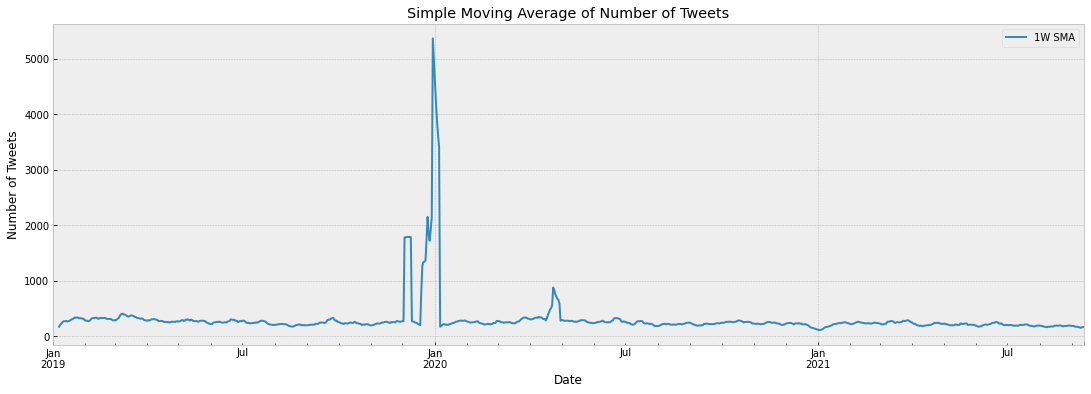

In [56]:
# Automated tweets identified
# Since the text of "tweet_call" is literally included in
# "tweet_answer" it is sufficient to just drop "tweet_call" to remove both
tweet_call = 'We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what\'s in store...'
tweet_answer = 'Thank you for your generosity. We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what\'s in store...'

# Functions
# --- Return tweets to be dropped
def drop_check(df, tweet):
    return df[df['text'].str.contains(tweet)]

# --- Drop unwanted tweets
def drop_peak(df, tweet):
    drop_df = df[df['text'].str.contains(tweet)]
    return df.drop(drop_df.index, axis=0)

# --- Plot DataFrame
def drop_plot(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
    fig.tight_layout()
    (df
     .rolling(7)
     .mean()
     .rename(columns={"counts": "1W SMA"})
     .plot(ax=axes)
    )

    axes.set_xlabel('Date')
    axes.set_ylabel('Number of Tweets')
    axes.set_title('Simple Moving Average of Number of Tweets')

# Main  
final_df = drop_peak(tdf, tweet_call)
drop_plot(tweet_counter(final_df))

## Save results

In [57]:
def drop_peak(df, tweet):
    drop_df = df[df['text'].str.contains(tweet)]
    return df.drop(drop_df.index, axis=0)

final_df = drop_peak(df, tweet_call)
final_df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


In [58]:
final_df.to_pickle('Your/Data/Path/tweet_dataframe_p1.pkl')